+------------------------+---------------------------+------------------------+-------------------------------+----------------------------+
| Distance to Goal(feet) | Size of Bottom Corner (%) | Size of Top Corner (%) | Size of Middle Bottom Box (%) | Size of Middle Top Box (%) |
+------------------------+---------------------------+------------------------+-------------------------------+----------------------------+
|           3            |            4.45           |          4.1           |             28.95             |           25.49            |
|           6            |            5.75           |          5.4           |             16.83             |            15.4            |
|           9            |            5.16           |          4.93          |             10.13             |            9.55            |
|           12           |            4.16           |          4.02          |              6.53             |            6.28            |
|           1

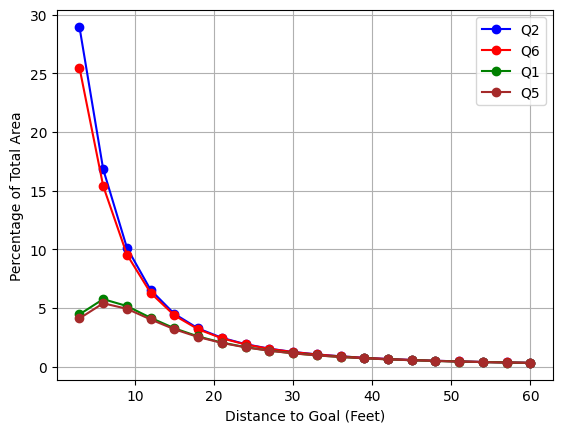

In [6]:
import math
from sympy import symbols, Eq, solve
import pandas as pd
from prettytable import PrettyTable
import matplotlib.pyplot as plt



distances = range(3, 63, 3)
results = []
size1l = []
size1h = []
size2l = []
size2h = []


def calculate_goal_angle(distance, goal_width=24):
    half_angle = math.atan((goal_width / 2) / distance)
    full_angle = 2 * half_angle
    return math.degrees(full_angle)

def calculate_goal_angley(distance, goal_height=24):
    height = math.atan((goal_height) / distance)
    return math.degrees(height)

for d in distances:
  #xpoints
  angle = calculate_goal_angle(d)
  height = calculate_goal_angley(d)

  quart1_angle = math.degrees(math.atan(6/d))
  quart2_angle = (angle/2)-quart1_angle

  #ypoints
  lowquart1_angle = math.degrees(math.atan(4/d))
  newdist1y= math.sqrt((d**2) + (4**2))
  highquart1_angle = math.degrees(math.atan(4/newdist1y))

  newdist1x = math.sqrt((d**2) + (6**2))
  lowquart2_angle = math.degrees(math.atan(4/newdist1x))
  newdist2y = math.sqrt(newdist1x**2 + (4**2))
  highquart2_angle = math.degrees(math.atan(4/newdist2y))

  newdist2x = math.sqrt(newdist1x**2 + (6**2))
  lowquart3_angle = math.degrees(math.atan(4/newdist2x))
  newdist3y = math.sqrt(newdist2x**2 + (4**2))
  highquart3_angle = math.degrees(math.atan(4/newdist3y))


  #Angles for goal area
  a= quart1_angle*lowquart2_angle
  b = quart1_angle*highquart2_angle
  c = quart2_angle*lowquart3_angle
  e = quart2_angle*highquart3_angle

  area = 2*(a+b+c+e)

  box_size1l = ((quart1_angle*lowquart2_angle)/6750)*100
  box_size1h = ((quart1_angle*highquart2_angle)/6750)*100
  box_size2l = ((quart2_angle*lowquart3_angle)/6750)*100
  box_size2h = ((quart2_angle*highquart3_angle)/6750)*100

  size1l.append(box_size1l)
  size1h.append(box_size1h)
  size2l.append(box_size2l)
  size2h.append(box_size2h)




  results.append({
    "distance": d,
    "Bottom Corner": box_size2l,
    "Top Corner": box_size2h,
    "Mid Low": box_size1l,
    "Mid High": box_size1h
})


# Create a table object
table = PrettyTable()

# Add column headers
table.field_names = ["Distance to Goal(feet)", "Size of Bottom Corner (%)", "Size of Top Corner (%)", "Size of Middle Bottom Box (%)"
, "Size of Middle Top Box (%)"]

# Add rows
for result in results:
    distance = result["distance"]
    split1 = round(result["Bottom Corner"],2)
    split2 = round(result["Top Corner"],2)
    split3 = round(result["Mid Low"],2)
    split4 = round(result["Mid High"],2)
  # Append the row data (with 5 columns)
    table.add_row([distance, split1, split2, split3, split4])

print(table)

plt.plot(distances, size1l, color='blue',label = 'Q2', marker = 'o')
plt.plot(distances, size1h, color='red', label = 'Q6', marker = 'o')
plt.plot(distances, size2l, color='green', label = 'Q1', marker = 'o')
plt.plot(distances, size2h, color='brown', label = 'Q5', marker = 'o')

plt.xlabel('Distance to Goal (Feet)')
plt.ylabel('Percentage of Total Area')
plt.grid(True)
plt.legend()
plt.savefig("graph3d.png")
plt.show()








